### ALUNO

**Nome: Vinicius Castellani Tonello, RA: 12325359**

### SOBRE A ATIVIDADE

#### TEMA
**PREDIÇÃO DE DIABETES**

---

#### DESCRIÇÃO DO PROBLEMA

Nas últimas décadas, a diabetes se tornou uma das doenças crônicas mais prevalentes no mundo, afetando mais de 800 milhões de adultos em todo o mundo (The Lancet, 2024). No Brasil, se estima que 13 milhões de pessoas vivam com a doença, sendo que 46% dos casos permanecem não diagnosticados, além disso, representa um sério desafio para os sistemas de saúde pública. Quando não diagnosticada ou controlada adequadamente, a diabetes pode resultar em complicações severas, incluindo doenças cardiovasculares, insuficiência renal, perda de visão, entre outras condições debilitantes.

**O objetivo dessa atividade** é desenvolver um modelo de classificação para prever a ocorrência de diabetes em pacientes com base em suas características médicas e demográficas, identificando também os fatores mais relevantes para a predição.

---

#### DATASET UTILIZADO

Diabetes prediction database

**Origem (link do dataset)**: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data

---

#### PARÂMETROS UTILIZADOS

**Inputs**
- **gender**: gênero biológico do paciente.
- **age**: idade do paciente.
- **hypertension**: presença de hipertensão (0 = não, 1 = sim).
- **heart_disease**: presença de doença cardíaca (0 = não, 1 = sim).
- **smoking_history**: histórico de fumo do paciente ("No Info" = sem informação, "never" = nunca fumou, "former" = ex-fumante, "not current" = não fuma atualmente, "current" = fumante atual, "ever" = já fumou em algum momento)
- **bmi**: índice de massa corporal (peso / altura^2). 
- **HbA1c_level**: medida do nível médio de açúcar no sangue nos últimos 2 a 3 meses em porcentagem
- **blood_glucose_level**: nível de glicose no sangue.

**Output**
- **diabetes**: presença ou não de diabetes (0 = não possui, 1 = possui).

### IMPORTANDO BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

**EXPLICANDO O CÓDIGO**
- Neste trecho de código importamos as bibliotecas necessárias para esse projeto, como pandas, numpy, matplotlib, seaborn, sklearn e imblearn utilizando as palavras "import" para trazer as bibliotecas e "from" para importar seus métodos específicos.

### IMPORTANDO O DATASET

In [2]:
diabetesDf = pd.read_csv("diabetes_prediction_dataset.csv")
diabetesDf = diabetesDf.head(1300)
diabetesDf.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


**EXPLICANDO O CÓDIGO**
- Nesta parte do código, lemos o arquivo do conjunto de dados, que está no formato CSV, usando o método "read_csv", após isso selecionamos apenas as primeiras 1300 linhas usando o método "head", e por fim mostramos as 10 primeiras linhas do dataset também utilizando o método "head".

### VERIFICANDO VALORES VAZIOS

In [3]:
diabetesDf.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**EXPLICANDO O CÓDIGO**
- Nesta linha de código, usamos o método "isNull", que retorna um novo dataframe contendo valores "False" se o valor a coluna do registro conter dados, e "True" se o valor da coluna não tiver dados, com esse conjunto de dados, usamos o método "sum", que soma os valores de cada coluna dos registros, sendo "False" valendo 0, e "True" valendo 1, que por fim, nos mostra quantos valores vazios cada coluna tem.

**INSIGHTS**
- Observamos, que a partir do resultado, não possuímos nenhum dado vazio em todas as colunas.

### ANALISANDO TIPOS DE DADOS DAS COLUNAS

In [4]:
diabetesDf.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

**EXPLICANDO O CÓDIGO**
- Nesta linha do código, podemos verificar o tipo de dado das colunas no nosso conjunto de dados, usando o atributo "dtypes", que retorna o tipo de dados, sendo "float", número decimal, "object", texto ou caractere, e "int" número inteiro.

**INSIGHTS**
- Observamos, que as colunas possuem o tipo de dado como "int", número inteiro, "float", número decimal, e apenas 2 colunas, "gender" e "smoking_history" são do tipo "object", ou seja são textos ou caractere.

### VERIFICANDO DISTRIBUIÇÕES DE DADOS DAS COLUNAS CATEGÓRICAS

In [5]:
print(diabetesDf['smoking_history'].value_counts().sort_index())
print()
print(diabetesDf['gender'].value_counts().sort_index())

smoking_history
No Info        463
current        111
ever            56
former         127
never          463
not current     80
Name: count, dtype: int64

gender
Female    761
Male      539
Name: count, dtype: int64


**EXPLICANDO O CÓDIGO**
- Nesta linha do código, selecionamos as colunas "smoking_history" e "gender" usando "diabetesDf['smoking_history']" e "diabetesDf['gender']", após isso contamos a frequência de cada valor distinto em ambas as colunas, usando o método "value_counts", ordenamos o resultado com base no valor do índice em ordem crescente usando o método "sort_index" e por fim mostramos os resultados usando o método "print".

**INSIGHTS**
- Observamos pelo resultado, que possuímos a maior parte dos dados da coluna "smoking_history" com os valores "Never" e "No Info" ambos com 463 dados, por conta de termos muitos dados com "No Info" indicando que temos muitos dados com valores classificados como vazios. Já na coluna "gender", a grande maior parte dos dados possui valor "Female", ou seja, temos muitos mais mulheres do que homens no nosso conjunto de dados.

### ANALISANDO VALORES ÚNICOS DAS COLUNAS CATEGÓRICAS

In [6]:
print(f"Valores unicos da coluna 'gender': {diabetesDf["gender"].unique()}")
print(f"Valores unicos da coluna 'smoking_history': {diabetesDf["smoking_history"].unique()}")

Valores unicos da coluna 'gender': ['Female' 'Male']
Valores unicos da coluna 'smoking_history': ['never' 'No Info' 'current' 'former' 'ever' 'not current']


### VERIFICANDO DISTRIBUIÇÕES DE DADOS DAS COLUNAS CATEGÓRICAS

**EXPLICANDO O CÓDIGO**
- Nesta linha do código, podemos verificar os valores únicos das colunas "gender" e "smoking_history" usando o método "unique", onde retorna uma lista contendo os valores distintos.

**INSIGHTS**
- Observamos, que os valores únicos da coluna "gender" são "Female" e "Male". Já na coluna "smoking_history", identificamos a presença do valor "No Info", que representa registros sem informação sobre o histórico de fumo, ou seja, dados ausentes ou incompletos.

### REMOVENDO DADOS NÃO EXISTENTES ("No Info") DA COLUNA "SMOKING_HISTORY"

In [7]:
diabetesDf = diabetesDf[diabetesDf["smoking_history"] != "No Info"]
print(diabetesDf['smoking_history'].value_counts().sort_index())

smoking_history
current        111
ever            56
former         127
never          463
not current     80
Name: count, dtype: int64


**EXPLICANDO O CÓDIGO**
- Na linha de código acima, filtramos o nosso conjunto de dados para selecionar apenas os registros que não possuem o valor da coluna "smoking_history" como "No Info" utilizando a condição "diabetesDf["smoking_history"] != "No Info"", onde se o valor da coluna for diferente de "No Info" retorna "True", se não retorna "False", no fim o "diabetesDf[]" seleciona apenas as linhas com o resultado "True", descartando aquelas que deram "False". Por fim, contamos a frequência de cada valor distinto na coluna "smoking_history", usando o método "value_counts", ordenamos o resultado com base no valor do índice em ordem crescente usando o método "sort_index" e por fim mostramos os resultados usando o método "print".

### TRANSFORMANDO VARIÁVEIS CATEGÓRICAS EM NUMÉRICAS

In [8]:
mapaGender = {
    'Female': 0.,
    'Male': 1.,
}

mapaHistoricoFumo = {
    "never": 0.,
    "former": 1.,
    "not current": 2.,
    "current": 3.,
    "ever": 4.,
}

diabetesDf["gender"] = diabetesDf["gender"].map(mapaGender)
diabetesDf["smoking_history"] = diabetesDf["smoking_history"].map(mapaHistoricoFumo)
diabetesDf.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,0.0,25.19,6.6,140,0
2,1.0,28.0,0,0,0.0,27.32,5.7,158,0
3,0.0,36.0,0,0,3.0,23.45,5.0,155,0
4,1.0,76.0,1,1,3.0,20.14,4.8,155,0
5,0.0,20.0,0,0,0.0,27.32,6.6,85,0
6,0.0,44.0,0,0,0.0,19.31,6.5,200,1
8,1.0,42.0,0,0,0.0,33.64,4.8,145,0
9,0.0,32.0,0,0,0.0,27.32,5.0,100,0
10,0.0,53.0,0,0,0.0,27.32,6.1,85,0
11,0.0,54.0,0,0,1.0,54.70,6.0,100,0


### EXPLICANDO O CÓDIGO
- No trecho de código acima, criamos mapeamentos das colunas "gender", sendo "female" representado pelo valor 0 e "male" pelo valor 1, e "smoking_history", sendo "never" representado pelo valor 0, "former" pelo valor 1, "not current" pelo valor 2, "current" pelo valor 3 e "ever" pelo valor 4, após a criação dos mapeamentos, em formato de dicionário, os aplicamos nas respectivas colunas usando o método "map", substituindo os valores das colunas pelos valores numéricos respectivos nos dicionários. Por fim, visualizamos as 10 primeiras linhas usando o método "Head".

### ANALISANDO DADOS

##### ANALISANDO RESUMO ESTATÍSTICO

In [9]:
diabetesDf.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,0.373955,46.568841,0.096774,0.052569,1.008363,28.086738,5.623536,140.187575,0.113501
std,0.484141,19.593543,0.295827,0.223304,1.335449,6.819589,1.144022,41.290278,0.317393
min,0.000000,1.240000,0.000000,0.000000,0.000000,10.770000,3.500000,80.000000,0.000000
25%,0.000000,31.000000,0.000000,0.000000,0.000000,23.880000,4.800000,100.000000,0.000000
50%,0.000000,47.000000,0.000000,0.000000,0.000000,27.320000,5.800000,145.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,2.000000,30.800000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.000000,1.000000,4.000000,69.370000,9.000000,300.000000,1.000000


**EXPLICANDO O CÓDIGO**
- Na linha de código acima, usamos o método "describe" para gerar um resumo estatístico de todas as colunas numéricas, contendo a quantidade de dados, a média, desvio padrão, valor mínimo, primeiro quartil, mediana, terceiro quartil e o valor máximo.

**INSIGHTS**
-  **gender (gênero):** Com média de 0.37, indica que cerca de 37% dos dados dos pacientes são do sexo codificado masculino, valendo 0. A distribuição é desbalanceada em favor do gênero feminino, tendo valor 1, contendo mais dados com esse gênero.
- **age (Idade):** A maioria das pessoas tem entre 31 e 61 anos, a mediana de 47 anos e é próxima da média, tendo valor 46.6, sugerindo uma distribuição simétrica. A presença de um valor mínimo de 1.24 anos indica que o conjunto de dados inclui crianças pequenas, enquanto o máximo de 80 representa idosos.
- **hypertension (Hipertensão):** Cerca de 9.7% dos pacientes apresentam hipertensão, tendo a média como 0.096, valor baixo. A distribuição é altamente concentrada em 0, indicando maioria dos pacientes sem presença de hipertensão.
- **heart_disease (Doença Cardíaca):** Apenas 5.2% dos pacientes têm doença cardíaca, a média baixa, 0.05, e os quartis todos em 0, indicam que temos poucas quantidades de pessoas com doença cardíaca, e muitas pessoas sem a presença de doenças. 
- **smoking_history (Histórico de Fumo):** A média de 1.0 e desvio alto com valor 1.33, indicam ampla variação, por conta dos quartis, 25% e 50%, podemos inferir que a maioria dos pacientes nunca fumou, tendo valor 0.
- **bmi (Índice de Massa Corporal):** A mediana é 27.3, próxima da média, tendo valor 28.1, o que sugere distribuição simétrica, possuímos valores acima de 30, por conta do terceiro quartil, 75%, que indicam obesidade, e também possuímos valor máximo de 69.4 o que indica possíveis outliers ou casos extremos.
- **HbA1c_level (Nível de Hemoglobina Glicada):** Mediana de 5.8 e média de 5.62 sugerem valores próximos da faixa pré-diabética, ou seja acima de 5.7, o valor máximo de 9 representa casos severos de diabetes.
- **blood_glucose_level (Glicemia):** A maioria dos valores está entre 100 e 159, observando pelos quartis, a média com valor 140, sugere risco elevado ou presença de casos de hiperglicemia, o valor máximo de 300 é elevado e pode ser considerado como outlier.
- **diabetes:** Com média de 0.113, indica que apenas 11.3% dos registros são de pessoas com diagnóstico de diabetes, tendo desbalanceamento de dados.

##### ANALISANDO DISTRIBUIÇÃO DOS DADOS PELA TARGET

In [10]:
diabetesDf['diabetes'].value_counts().sort_index()

diabetes
0    742
1     95
Name: count, dtype: int64

**EXPLICANDO O CÓDIGO**
- Nesta linha do código, selecionamos a coluna "diabetes" usando "diabetesDf['diabetes']", após isso contamos quantas vezes o valor 0 e 1 aparecem na coluna, usando o método "value_counts", por fim, ordenamos o resultado com base no valor do índice em ordem crescente usando o método "sort_index". 

**INSIGHTS**
- Observamos pelo resultado, que possuímos a maior parte dos dados classificados como "sem diabetes", possuindo o valor zero, com 742 dados, e temos apenas 95 dados classificados como "com diabetes", tendo o valor 1.

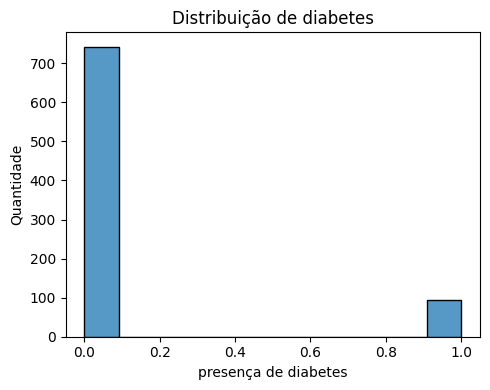

In [11]:
plt.figure(figsize=(5, 4))
sns.histplot(x = 'diabetes', data = diabetesDf)
plt.title('Distribuição de diabetes')
plt.xlabel('presença de diabetes')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

**EXPLICANDO O CÓDIGO**
- Neste trecho de código, definimos o tamanho do gráfico usando o método "figure" junto com o parâmetro "figsize" com os valores de 6 polegadas na horizontal e 4 na vertical, depois isso criamos o histograma passando como parâmetro, o eixo X, que vamos usar a coluna "diabetes", e os dados no parâmetro "data" passando o nosso conjunto de dados, após isso definimos o título do gráfico usando o método "title", a legenda do eixo x, usando o parâmetro "xlabel", e do eixo y, usando o parâmetro "ylabel", por fim usamos o método "tight_layout" para ajustar as margens e rótulos dos eixos, e mostramos o gráfico usando "show".

**INSIGHTS DO GRÁFICO**
- Observando a distribuição de diabetes acima, revela uma maior quantidade de dados sem presença de diabetes, valor 0, e pouca quantidade de dados com presença de diabetes, valor 1, indicando que temos um forte desbalanceamento entre os dados da coluna "diabetes".

##### AGRUPANDO COLUNAS EM QUEM TEM DIABETES OU NÃO

In [12]:
medianaMediaPorDiabetes = diabetesDf.groupby("diabetes").agg(['mean', "median"])
medianaMediaPorDiabetes

gender               age        hypertension        heart_disease  \
              mean median       mean median         mean median          mean   
diabetes                                                                        
0         0.366577    0.0  44.979946   45.0     0.076819    0.0      0.044474   
1         0.431579    0.0  58.978947   60.0     0.252632    0.0      0.115789   

                smoking_history               bmi        HbA1c_level         \
         median            mean median       mean median        mean median   
diabetes                                                                      
0           0.0        1.000000    0.0  27.525984  27.32    5.422911    5.8   
1           0.0        1.073684    1.0  32.466526  30.80    7.190526    6.8   

         blood_glucose_level         
                        mean median  
diabetes                             
0                 133.721024  140.0  
1                 190.694737  159.0

**EXPLICANDO O CÓDIGO**
- No trecho do código acima, agrupamos os registros, dados, dos pacientes pela qualidade usando o método "groupby" os transformando em subconjuntos, após o agrupamento, calculamos a média e mediana de cada coluna dos dados agrupados utilizando o método "agg" passando como lista o que queremos calcular, 'mean' e 'median', tendo como resultado uma tabela, por fim, mostramos essa tabela, apenas escrevendo o seu nome "medianaMediaPorDiabetes".

**INSIGHTS**
- Observamos, que as pessoas que possuem diabetes são mais velhas, o seu histórico de fumo é ex-fumante, e também possui IMC, nível de glicose no sangue e medida do nível médio de açúcar no sangue nos últimos 2 a 3 meses maiores, se comparados com as pessoas que não possuem diabetes.


##### ANALISANDO DISTRIBUIÇÕES DAS COLUNAS

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'smoking_history'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>,
        <Axes: title={'center': 'diabetes'}>]], dtype=object)

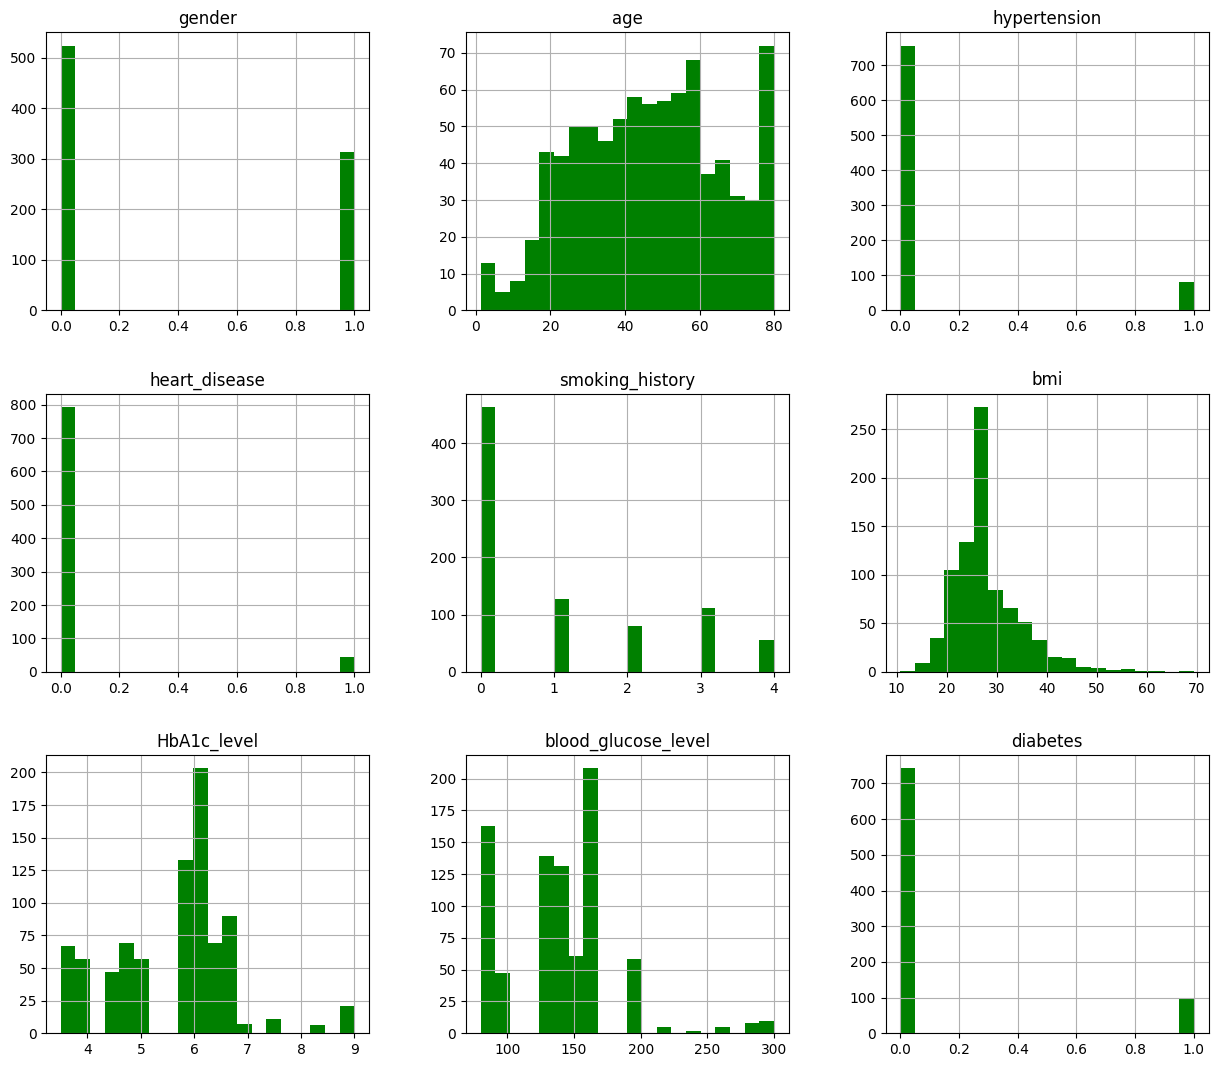

In [13]:
# DADOS EM GERAL

diabetesDf.hist(bins = 20, figsize = (15,13), color = 'green')

**EXPLICANDO O CÓDIGO**
- Na linha de código acima, criamos um gráfico de histograma para todas as colunas usando o método "hist", passando o número de intervalos em que os dados serão divididos usando o parâmetro "bins", definimos o tamanho da figura fornecendo, em polegadas, o tamanho do eixo X, horizontal, e o tamanho do eixo Y, no eixo vertical, usando o parâmetro "figsize", por fim, definimos a cor do gráfico como verde, utilizando o parâmetro "color".

**INSIGHTS DO GRÁFICO**
- **gender (gênero):** observamos que possuímos mais pessoas do gênero feminino do que o masculino no nosso conjunto de dados.
- **age (idade):** ao observar o gráfico, vemos que no nosso conjunto de dados, as idades variam entre 0 a 80 anos, tendo uma maior predominância, com picos, em 80 e 60 anos, indicando que a maioria dos pacientes são adultos ou idosos.
- **hypertension (hipertensão):** observamos que a maior parte dos pacientes no nosso conjunto de dados não possui hipertensão.
- **heart_disease (doença cardíaca):** a partir do gráfico, a maior parte dos pacientes no conjunto de dados não possui doença cardíaca.
- **smoking_history (histórico de fumo):** podemos inferir no gráfico que a maior parte das pessoas nunca fumaram, valor 0, com uma grande predominância, seguido de pessoas ex-fumantes, valor 1, logo em seguida de fumante atual, valor 3, depois não fuma atualmente, valor 2, e por último, já fumou, com valor 4.
- **bmi (IMC):** possui uma distribuição assimétrica à direita, com a maior parte dos valores entre 20 e 30, tendo pessoas classificadas como peso normal e sobrepeso, porém há valores maiores que 40, puxando a cauda para à direita e também indicando que temos presença de pessoas obesas severas, lembrando que IMC menor que 18.5 é considerado abaixo do peso, entre 18.5 e 24.9 é considerado normal, entre 25 e 29.9 é considerado sobre peso, e maior que 30 é considerado obeso.
- **HbA1c_level (nível de hemoglobina glicada, HbA1c):** a partir do gráfico, podemos observar que a maior parte dos valores estão concentrados entre 5.5 e 6, tendo glicemia média, porém temos dados com valores acima de 6.5, indicando diabetes.
- **blood_glucose_level (nível de glicose):** ao analisar o gráfico temos concentrações de dados entre 80 e 90 e também entre 150 e 160, porém temos pessoas com níveis mais altos que 160, podendo indicar diabetes, sendo que quantidades maiores de glicose, podem indicar diabetes.
- **diabetes**: observamos a partir do gráfico, que temos uma predominância de pessoas sem diabetes, valor 0, do que as pessoas que possui diabetes, valor 1. 

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'smoking_history'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>, <Axes: >]],
      dtype=object)

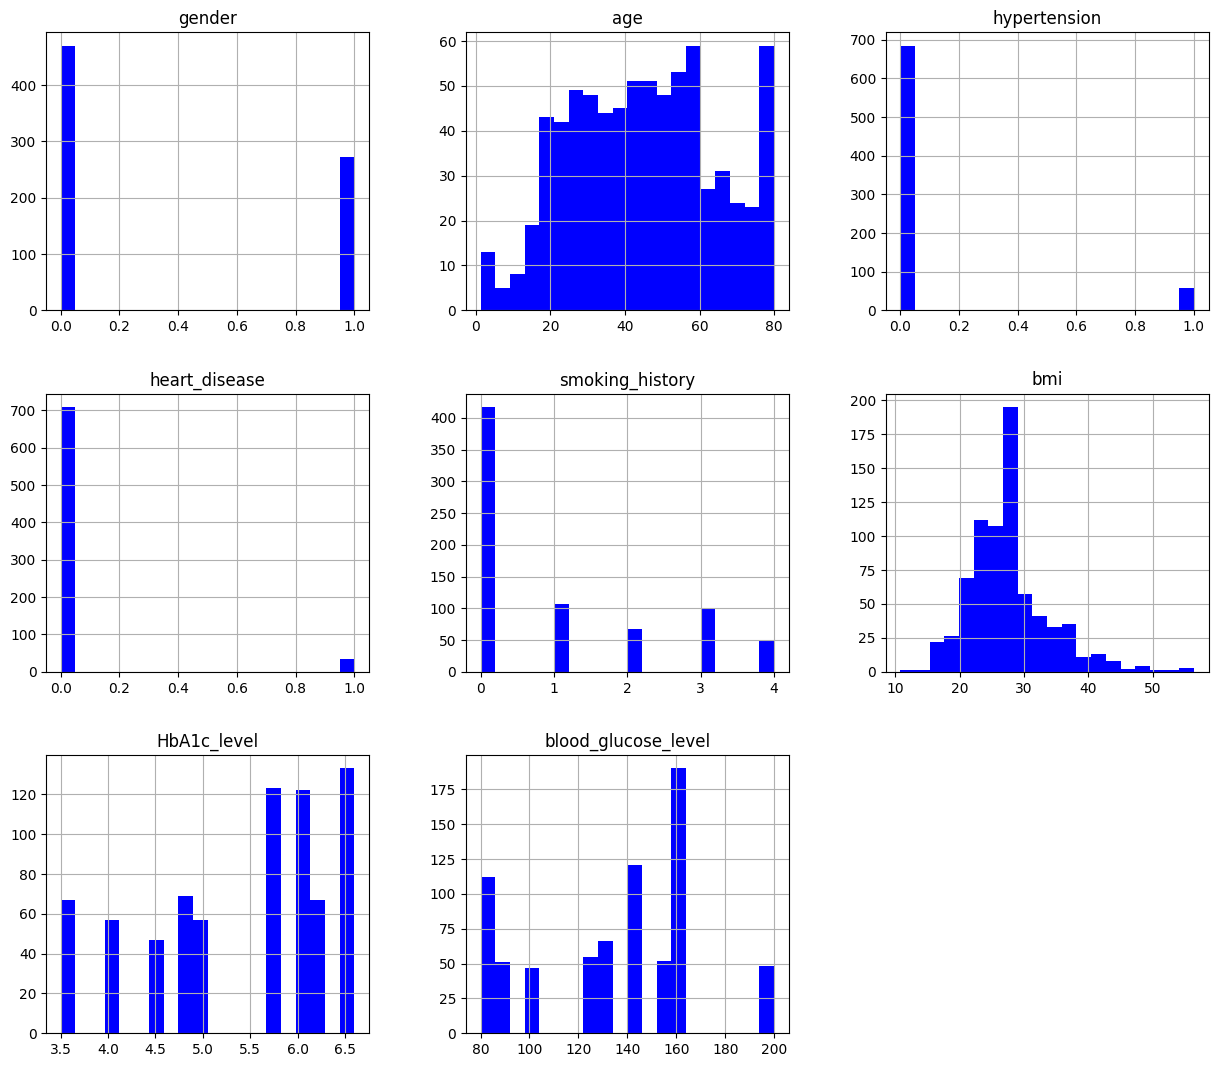

In [14]:
# QUEM NÃO TEM DIABETES

semDiabetesDf = diabetesDf[diabetesDf["diabetes"] == 0]
semDiabetesDf = semDiabetesDf.drop("diabetes", axis = 1)

semDiabetesDf.hist(bins = 20, figsize = (15,13), color = 'blue')

**EXPLICANDO O CÓDIGO**
- No trecho do código acima, obtemos um dataset das pessoas sem diabetes, com a o valor da coluna "diabetes" valendo 0, usando uma filtragem no dataset onde fazemos "diabetesDf['diabetes'] == 0", e depois removemos a coluna "diabetes", após isso criamos o gráfico de histograma para todas as colunas usando o método "hist", passando o número de intervalos em que os dados serão divididos usando o parâmetro "bins", definimos o tamanho da figura fornecendo, em polegadas, o tamanho do eixo X, horizontal, e o tamanho do eixo Y, no eixo vertical, usando o parâmetro "figsize", por fim, definimos a cor do gráfico como azul, usando o parâmetro "color".

**INSIGHTS DO GRÁFICO**
- **gender (gênero):** observamos que a maioria das pessoas sem diabetes é do gênero feminino, valor 0, mas temos uma proporção considerável de pessoas do gênero masculino, valor 1, mesmo não sendo predominante.
- **age (idade):** ao observar o gráfico, vemos que no nosso conjunto de dados, as idades variam entre 0 a 80 anos, tendo uma maior predominância, com picos, em 40 e 60 anos com um pico predominante em 80 e 55 anos, indicando que a maioria dos pacientes são adultos ou idosos.
- **hypertension (hipertensão):** observamos que a maior parte dos pacientes sem diabetes não possui hipertensão.
- **heart_disease (doença cardíaca):** a partir do gráfico, a maior parte dos pacientes sem diabetes no conjunto de dados não possui doença cardíaca
- **smoking_history (histórico de fumo):** podemos inferir no gráfico que a maior parte das pessoas sem diabetes nunca fumaram, valor 0, com uma grande predominância, seguido de pessoas ex-fumantes, valor 1, logo em seguida de fumante atual, valor 3, depois não fuma atualmente, valor 2, e por último, já fumou, com valor 4.
- **bmi (imc):** possui uma distribuição assimétrica à direita, com a maior parte dos valores entre 20 e 30 e principalmente no valor 28, tendo pessoas sem diabetes classificadas como peso normal e sobrepeso, porém há valores maiores que 40, puxando a cauda para à direita e também indicando que temos presença de pessoas obesas severas, lembrando que IMC menor que 18.5 é considerado abaixo do peso, entre 18.5 e 24.9 é considerado normal, entre 25 e 29.9 é considerado sobre peso, e maior que 30 é considerado obeso.
- **HbA1c_level (nível de hemoglobina glicada, HbA1c):** a partir do gráfico, podemos observar que a maior parte dos valores estão concentrados acima de 5.5 com um maior pico e predominância no valor 6.5, podendo indicar pré-diabetes.
- **blood_glucose_level (nível de glicose):** ao analisar o gráfico temos vários picos definidos, um em 140 e outro em 160, podendo indicar pré-diabetes mas também temos concentrações de dados entre 80 e 100, indicando normalidade. 

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'smoking_history'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>, <Axes: >]],
      dtype=object)

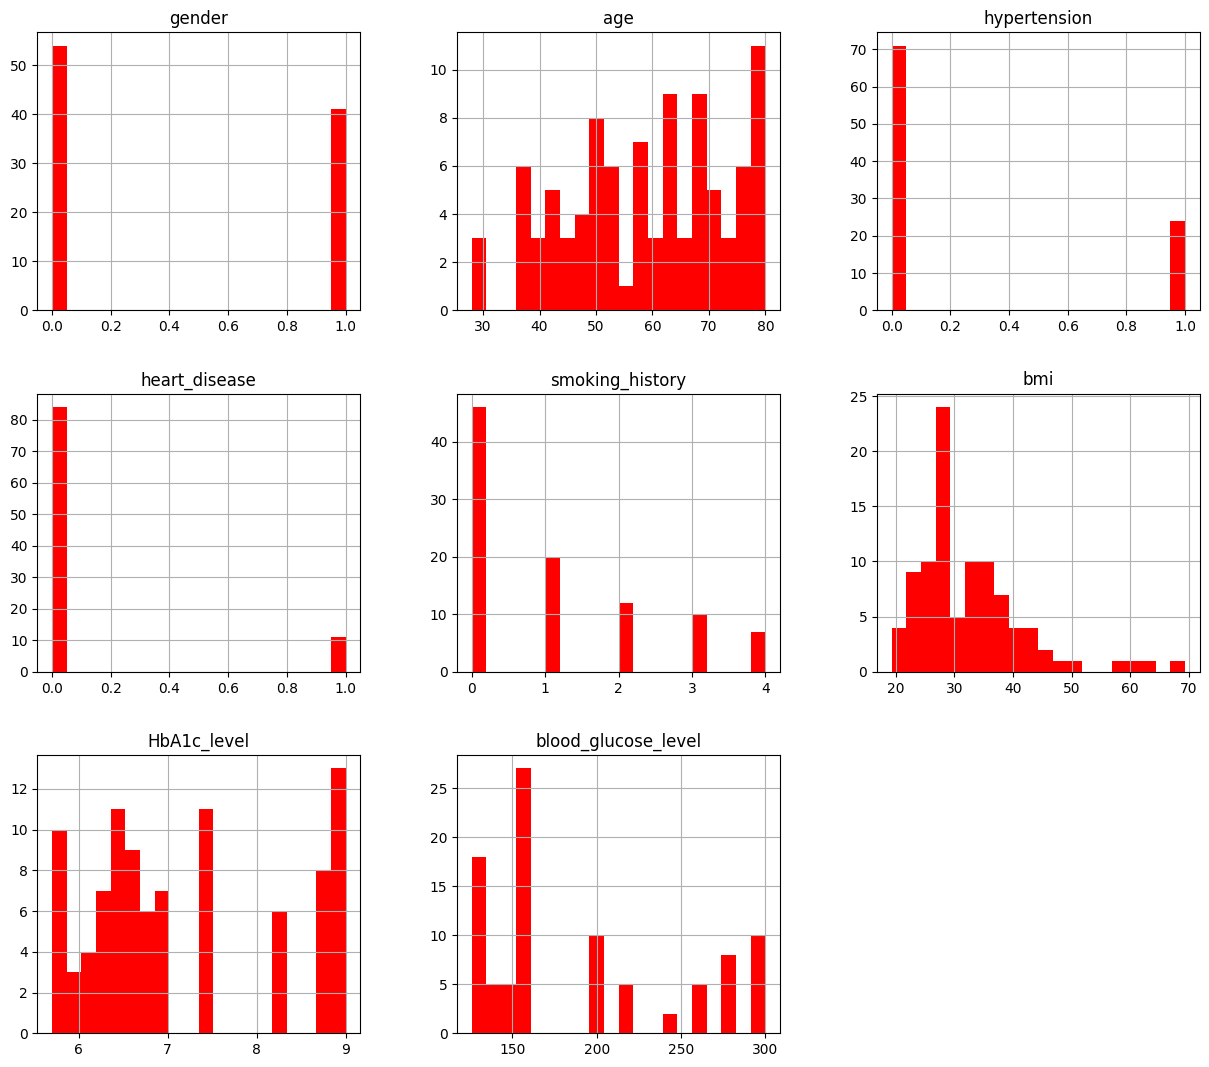

In [15]:
# QUEM TEM DIABETES

comDiabetesDf = diabetesDf[diabetesDf["diabetes"] == 1]
comDiabetesDf = comDiabetesDf.drop("diabetes", axis = 1)

comDiabetesDf.hist(bins = 20, figsize = (15,13), color = 'red')

**EXPLICANDO O CÓDIGO**
- No trecho do código acima, obtemos um dataset das pessoas com diabetes, com a o valor da coluna "diabetes" valendo 1, usando uma filtragem no dataset onde fazemos "diabetesDf['diabetes'] == 1", e depois removemos a coluna "diabetes", após isso criamos o gráfico de histograma para todas as colunas usando o método "hist", passando o número de intervalos em que os dados serão divididos usando o parâmetro "bins", definimos o tamanho da figura fornecendo, em polegadas, o tamanho do eixo X, horizontal, e o tamanho do eixo Y, no eixo vertical, usando o parâmetro "figsize", por fim, definimos a cor do gráfico como vermelho, usando o parâmetro "color".

**INSIGHTS DOS GRÁFICOS**
- **gender (gênero):** observamos que a maioria das pessoas sem diabetes é do gênero feminino, valor 0, mas temos uma proporção considerável e grande de pessoas do gênero masculino, valor 1.
- **age (idade):** ao observar o gráfico, vemos que no nosso conjunto de dados, as idades variam entre 0 a 80 anos, tendo uma maior predominância, entre 40 e 80 anos com mais casos entre 60 e 80 anos, tendo o maior pico em 80 anos, indicando que a maioria dos pacientes são adultos ou idosos.
- **hypertension (hipertensão):** observamos que a maior parte dos pacientes sem diabetes não possui hipertensão, porém temos um pico considerável no valor 1, indicando presença de hipertensão.
- **heart_disease (doença cardíaca):** a partir do gráfico, a maior parte dos pacientes com diabetes no conjunto de dados não possui doença cardíaca, com pequenos dados no valor 1, tendo doença cardíaca.
- **smoking_history (histórico de fumo):** podemos inferir no gráfico que a maior parte das pessoas sem diabetes nunca fumaram, valor 0, com uma grande predominância, seguido de pessoas ex-fumantes, valor 1, logo em seguida de não fuma atualmente, valor 2, depois fumante atual, valor 3, e por último, já fumou, com valor 4.
- **bmi (IMC):** possui uma distribuição assimétrica à direita, com a maior parte dos valores entre 25 e 35 e principalmente no valor 29, tendo pessoas com diabetes classificadas como peso normal e sobrepeso, porém há valores maiores que 40, possuindo valores como 50, 60 e 70, puxando a cauda para à direita e também indicando que temos presença de pessoas obesas severas e mórbida.
- **HbA1c_level (nível de hemoglobina glicada, HbA1c):** a partir do gráfico, podemos observar que a maior parte dos valores estão concentrados acima de 5.5, principalmente entre 6.5 e 8.5, tendo picos no valor 7.5 e 9, indicando diabetes.
- **blood_glucose_level (nível de glicose):** ao analisar o gráfico os dados estão concentrados entre 125 e 175, porém temos valores acima de 200 chegando até no valor 300 indicando casos graves e diabetes.

##### VISUALIZANDO CORRELAÇÃO ENTRE COLUNAS

In [16]:
correlacao = diabetesDf.corr(method='pearson')
correlacao

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.002765,0.030983,0.072427,0.045110,0.022180,0.003311,0.036040,0.042614
age,-0.002765,1.000000,0.197479,0.273383,0.073047,0.142435,0.127143,0.121325,0.226768
hypertension,0.030983,0.197479,1.000000,0.122080,0.031255,0.128993,0.061123,0.092327,0.188629
heart_disease,0.072427,0.273383,0.122080,1.000000,0.054680,0.035177,0.035887,0.068855,0.101364
smoking_history,0.045110,0.073047,0.031255,0.054680,1.000000,0.000016,-0.006784,0.007217,0.017512
bmi,0.022180,0.142435,0.128993,0.035177,0.000016,1.000000,0.145775,0.075111,0.229940
HbA1c_level,0.003311,0.127143,0.061123,0.035887,-0.006784,0.145775,1.000000,0.162139,0.490401
blood_glucose_level,0.036040,0.121325,0.092327,0.068855,0.007217,0.075111,0.162139,1.000000,0.437950
diabetes,0.042614,0.226768,0.188629,0.101364,0.017512,0.229940,0.490401,0.437950,1.000000


**EXPLICANDO O CÓDIGO**
- Na parte do código acima, calculamos a correlação entre as colunas numéricas usando o método "corr", passando como parâmetros o tipo de correlação, que usamos "pearson" onde mede a relação linear variando entre -1 e 1, onde -1 indica correlação negativa, quando uma coluna aumenta a outra diminui, vice versa, 0, indicando que não há correlação entre as colunas, e 1, sendo correlação positiva, quando uma coluna aumenta a outra também aumenta.

<Axes: >

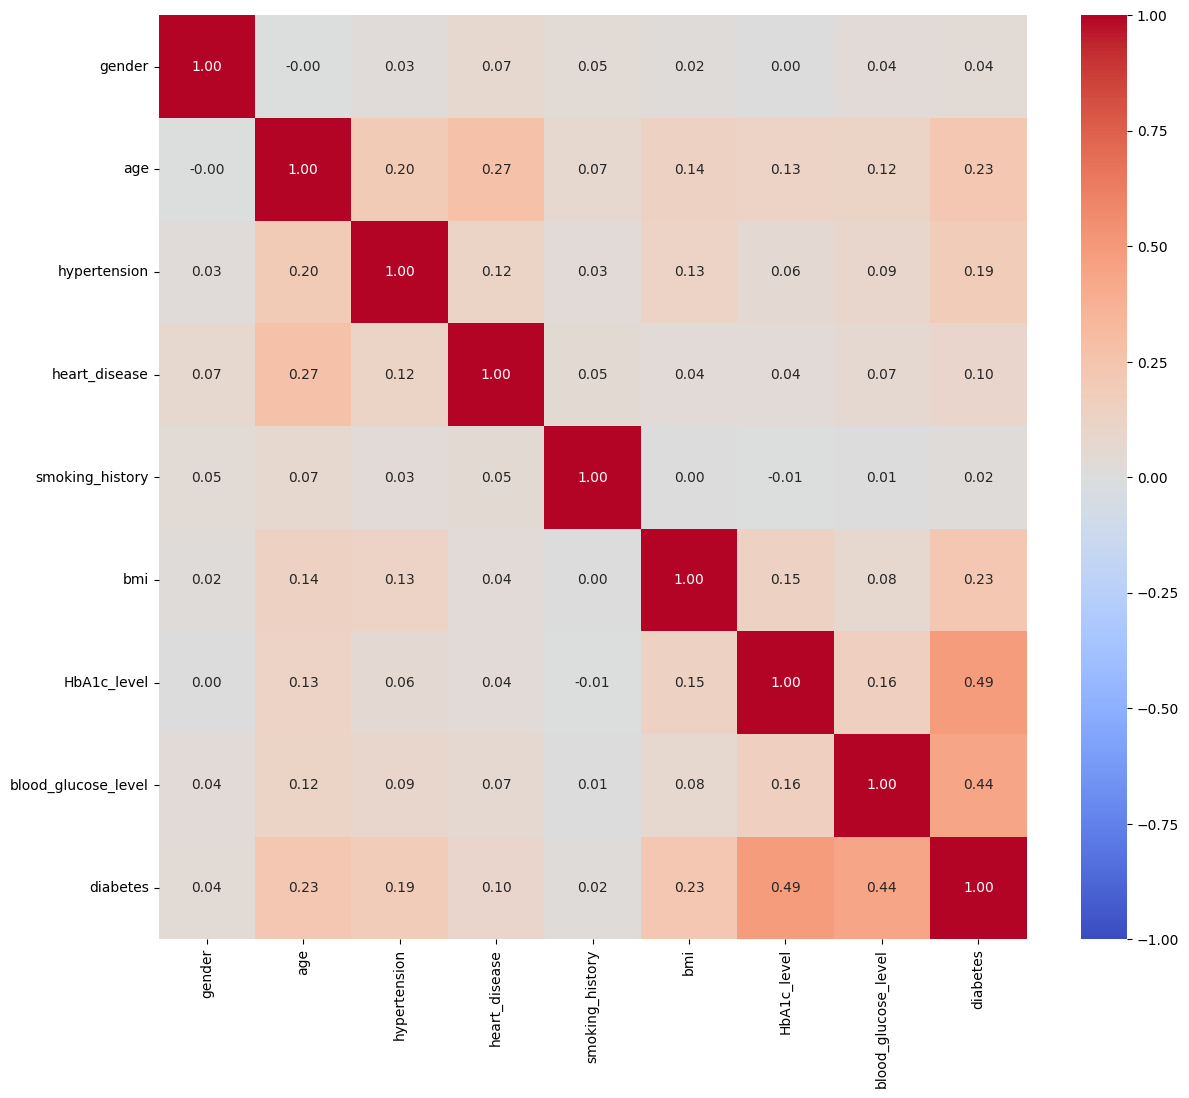

In [17]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlacao, cmap = 'coolwarm', vmin = -1.0, vmax = 1.0, fmt = '.2f', annot = True)

**EXPLICANDO O CÓDIGO**
- Neste trecho de código, definimos o tamanho da figura com 14 polegadas na largura e 12 polegadas na altura usando o método "figure", após isso, criamos um mapa de calor utilizando o método "heatmap", passando como parâmetro a tabela de correlação criada anteriormente, a escala de cores como "coolwarm" no parâmetro "cmap", onde o azul representa os valores negativos e o vermelho os positivos, a formatação dos números em 2 casas decimais no parâmetro "fmt", que utilizamos '.2f', o valor máximo da escala de cores como 1 no parâmetro "vmax" e o valor mínimo da escala de cores como -1 no parâmetro "vmin" e por fim mostramos os valores numéricos dentro de cada bloco no gráfico usando o parâmetro "annot" como "True".

**INSIGHTS DO GRÁFICO**
- A matriz de correlação mostra que as variáveis mais associadas ao diagnóstico de diabetes são "HbA1c_level", com valor 0.49, e "blood_glucose_level", com o valor 0.44, indicando que quantidades maiores de hemoglobina glicada e glicose no sangue estão relacionadas a presença de diabetes, e quantidades menores relacionadas com a presença de não diabetes. Além disso, as colunas "age", valendo 0.23, "bmi", com valor 0.23, e "hypertension", com 0.19, sugere que idade avançada, sobrepeso e pressão alta também tem uma boa correlação com a presença de diabetes. Por outro lado, variáveis como "heart_disease", valendo 0.10, "gender", tendo como valor 0.04, e "smoking_history", possuindo valor 0.02, apresentam correlação baixa com a coluna "diabetes".

### PROCESSAMENTO DE DADOS

##### NORMALIZANDO DADOS

In [18]:
colunasParaNormalizar = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

scaler = MinMaxScaler()
diabetesDf[colunasParaNormalizar] = scaler.fit_transform(diabetesDf[colunasParaNormalizar])
diabetesDf.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,1.000000,0,1,0.0,0.246075,0.563636,0.272727,0
2,1.0,0.339766,0,0,0.0,0.282423,0.400000,0.354545,0
3,0.0,0.441341,0,0,3.0,0.216382,0.272727,0.340909,0
4,1.0,0.949213,1,1,3.0,0.159898,0.236364,0.340909,0
5,0.0,0.238192,0,0,0.0,0.282423,0.563636,0.022727,0
6,0.0,0.542915,0,0,0.0,0.145734,0.545455,0.545455,1
8,1.0,0.517522,0,0,0.0,0.390273,0.236364,0.295455,0
9,0.0,0.390554,0,0,0.0,0.282423,0.272727,0.090909,0
10,0.0,0.657186,0,0,0.0,0.282423,0.472727,0.022727,0
11,0.0,0.669883,0,0,1.0,0.749659,0.454545,0.090909,0


**EXPLICANDO O CÓDIGO**
- Neste trecho de código, criamos uma lista armazenando todas as colunas numéricas e que necessitam de normalização, como as colunas "age", "bmi", "HbA1c_level", "blood_glucose_level", após isso criamos um escalador, que normaliza os dados, que contém o objeto da classe "MinMaxScaler" que utiliza a fórmula "X = X - Xmin / Xmax - Xmin" , e depois aprendemos os valores mínimos e máximos para cada coluna da lista, após aprender os valores mínimos e máximos, ele transforma os dados das colunas em valores que ficam entre 0 e 1 utilizando o método "fit_transform" passando como parâmetro a nossa lista criada, por fim, mostramos as 10 primeiras linhas do nosso conjunto de dados usando o método "head" passando como parâmetro o valor 10.

### TREINANDO MODELO DE CLASSIFICAÇÃO

##### DIVIDINDO DADOS EM TREINO E TESTE

In [19]:
features = diabetesDf.drop("diabetes", axis = 1)
alvo =  diabetesDf["diabetes"] 

xTreino, xTeste, yTreino, yTeste = train_test_split(features, alvo, test_size = 0.3, random_state = 42)

**EXPLICANDO O CÓDIGO**
- Nesta parte do código, armazenamos na variável "features" todas as colunas exceto a coluna "diabetes", fazemos isso removendo a coluna "diabetes" usando o método "drop" com o parâmetro "axis" valendo 1, para remover coluna e não linha, depois armazenamos na variável "alvo" apenas a coluna "quality", aquilo que queremos prever, selecionando essa coluna no dataset usando "['diabetes']". Após tudo isso, dividimos os dados em "treino" e "teste" usando o método "train_test_split", para dividir os dados aleatoriamente, passamos como parâmetro as variáveis "features" e "alvo", definimos a porcentagem, tamanho, dos dados de teste no parâmetro "test_size", que usamos 0.3, 30%, com isso 70% dos dados vão ser usados para treino, e por fim, definimos no parâmetro "random_state" o valor 42, que garante que a separação seja sempre igual se rodarmos o código novamente.

##### BALANCEANDO DADOS

In [20]:
smote = SMOTE(random_state = 42)
xTreinoBalanceado, yTreinoBalanceado = smote.fit_resample(xTreino, yTreino) # type: ignore

**EXPLICANDO O QUE É SMOTE**
- O SMOTE (Synthetic Minority Over-sampling Technique) é uma técnica para balancear dados em problemas de classificação, é usada quando temos dados desbalanceados, como no nosso caso onde temos muitas pessoas classificadas como "não diabéticas" representada pelo valor 0 do que "diabéticas" representada pelo valor 1, o SMOTE cria exemplos sintéticos da classe minoritária, no caso "diabéticas", onde ele seleciona um exemplo da classe minoritária, calcula para cada ponto da classe minoritária os seus vizinhos usando a distância euclidiana, encontra seus 5 vizinhos mais próximos, por padrão, e gera novos pontos ao longo do segmento da reta que conectam um ponto original a seus vizinhos mais próximos. O SMOTE utiliza a seguinte fórmula: "Novo_Ponto = Exemplo_original + λ * (Vizinho - Exemplo_original)", onde λ é um valor aleatório entre 0 e 1.

**EXPLICANDO O CÓDIGO**
- No trecho de código acima, criamos um objeto da classe SMOTE onde passamos no parâmetro "random_state" o valor 42 para garantir que os exemplos gerados sejam os mesmos a cada execução do código, após isso, aplicamos o SMOTE nos dados de treino usando o método "fit_resample" onde ele analisa os dados e identifica exemplos da classe minoritária, nesse caso as pessoas que tem diabetes, e gera novos exemplos sintéticos, passamos como parâmetro os dados de treino, sendo "xTreino" e "yTreino", e armazenamos o resultado nas variáveis "xTreinoBalanceado" e "yTreinoBalanceado".

##### TREINANDO REDE NEURAL

In [21]:
classificadorRedeNeural = MLPClassifier(
        solver = "adam",
        activation = "relu",
        alpha = 1e-4,
        hidden_layer_sizes = (490, 490),
        random_state = 1,
        max_iter = 1000,
    )

classificadorRedeNeural.fit(xTreinoBalanceado, yTreinoBalanceado) # type: ignore

yPred = classificadorRedeNeural.predict(xTeste)
nivelAcuracia = accuracy_score(yTeste, yPred)

print(f"Acuracia: {nivelAcuracia}")
print(classification_report(yTeste, yPred))

Acuracia: 0.9682539682539683
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       222
           1       0.89      0.83      0.86        30

    accuracy                           0.97       252
   macro avg       0.94      0.91      0.92       252
weighted avg       0.97      0.97      0.97       252



**EXPLICANDO O QUE SÃO REDES NEURAIS**
- A rede neural é um modelo de aprendizado de máquina inspirado no cérebro humano, onde ela aprende a partir de dados. Ela é formada por camadas de entrada, onde recebe os dados de entrada, dados iniciais, camada oculta, onde são camadas intermediárias que processam, aplicam transformações, aprendendo padrões, enviando o resultado para a próxima camada, depois de passar por todas as camadas ocultas, a camada final fornece o resultado do processamento. Durante o treinamento, a rede ajusta as conexões e pesos para melhorar as previsões.

**EXPLICANDO O CÓDIGO**
- No trecho de código acima, criamos um modelo de rede neural usando a classe "MLPClassifier", aonde passamos o valor "adam" no parâmetro "solver", onde é um algoritmo de otimização para treinar a rede neural, ele combina dois conceitos, momentum, que considera o histórico dos gradientes para ganhar velocidade, e adaptação da taxa de aprendizado, ajustando o quanto cada peso é atualizado com base em sua variação anterior, também passamos o valor "relu" no parâmetro "activation", definindo a função de ativação usada nos neurônios das camadas ocultas, ela transforma a saída do neurônio em 0 se o valor for negativo ou mantém o valor se for positivo, utilizamos o valor "1e - 4" no parâmetro "alpha", que adiciona uma penalidade aos pesos grandes da rede durante o treinamento, evitando que o modelo memorize demais os dados de treino e melhora a capacidade de generalização, definimos a quantidade de camadas ocultas e a quantidade de neurônios em cada uma, nesse caso, usamos 2 camadas de neurônios contendo 490 cada, além disso, utilizamos a semente "1" no parâmetro "random_state", onde é uma semente para o gerador de números aleatórios usado na inicialização dos pesos e na divisão de dados, garantindo que os resultados do treinamento sejam sempre os mesmos, e por fim definimos o número máximo de iterações que o algoritmo pode executar durante o treinamento, nesse caso 1000, a cada iteração, a rede ajusta seus pesos para reduzir o erro. Após criar o modelo de redes neurais, a treinamos usando o método "fit" passando como parâmetro o "xTreino" e "yTreino" já balanceado, medimos a acurácia destas previsões, comparando elas com os rótulos reais, 0 ou 1, usando o método "accuracy_score", passando como parâmetro o "yTeste", dados para teste, e "yPred", as previsões feitas no método "predict", por fim, mostramos o resultado da acurácia e o relatório de classificação via método "print".

**INSIGHTS**
- O modelo obteve uma acurácia muito alta, acertando cerca de 96% das previsões no conjunto de teste, ele também teve um desempenho muito bom para identificar pessoas sem diabetes, valor 0, com precisão 98%, acertando 98% dos que realmente tinham diabetes, e entre os que foram previstos como tendo diabetes, 98% tinham. Porém, para classe minoritária, pessoas com diabetes com valor 1, obtemos uma precisão de 89%, indicando que entre os que foram previstos com diabetes, 86% realmente tinham, e entre os que realmente tinham diabetes, o modelo acertou 83%, em suma, mesmo com o balanceamento das classes, há um leve desequilíbrio no desempenho entre as classes.

##### CRIANDO FUNÇÃO DE PREDIÇÃO

In [22]:
def preverDiabetes(*args):
    inputDf = pd.DataFrame([args], columns = xTreino.columns)
    
    featuresNumericas = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
    inputDf[featuresNumericas] = scaler.transform(inputDf[featuresNumericas])
    
    predicao = classificadorRedeNeural.predict(inputDf)[0]
    proba = classificadorRedeNeural.predict_proba(inputDf)[0]
    
    if predicao == 1:
        print(f"A pessoa têm indícios de diabetes com a probabilidade de {round(proba[1]* 100, 2)}% de chance de ter a doença")
    else:
        print(f"A pessoa não têm indícios de diabetes com a probabilidade de {round(proba[1]* 100, 2)}% de chance de ter a doença")

**EXPLICANDO O CÓDIGO**
- No trecho de código acima, definimos uma função chamada "preverDiabetes" usando a palavra reservada "def", definimos como parâmetro "*args", onde é uma sintaxe especial onde podemos passar vários argumentos na chamada da função sem precisar escrever todos esses argumentos na função. Nessa função, criamos um dataframe com os valores recebidos como argumentos, com os nomes das colunas do nosso "xTreino", após isso normalizamos as colunas numéricas, como "age", "bmi", "HbA1c_level" e "blood_glucose_level", utilizando o "scaler" definido anteriormente, depois de normalizados, utilizamos o modelo de rede neural treinado anteriormente para prever se o paciente tem diabetes ou não com o método "predict" e também usando o método "predict_proba" onde obtemos a probabilidade da previsão, acessando em ambos o primeiro elemento, que é a classe prevista para a pessoa utilizando "[0]". Por fim, fazemos uma estrutura de condição em que se o valor da previsão for 1, o paciente tem diabetes, se não, a pessoa não possui diabetes, após obter a classificação, mostramos na tela essa classificação usando o método "print" junto com o método "round" para transformar o valor da probabilidade em porcentagem e em 2 casas decimais, utilizando "round(proba[1], 2)".

##### PREVENDO ÍNDICIOS DE DIABETES

In [23]:
preverDiabetes(
    1.,           # gender: Gênero (0: Feminino, 1: Masculino)
    50.,          # age: idade
    1.,           # hypertension: hipertensão (0: Não, 1: Sim)
    0.,           # heart_disease: doença cardíaca (0: Não, 1: Sim) 
    3.,           # smoking_history: histórico de fumo (0: nunca fumou, 1: ex-fumante, 2: não fuma atualmente, 3: fumante atual, 4: sempre fumou)
    27.32,        # bmi: índice de massa corporal
    5.7,          # HbA1c_level: glicemia média do paciente nos últimos 2-3 meses
    260           # blood_glucose_level: glicose no sangue
)

A pessoa têm indícios de diabetes com a probabilidade de 99.98% de chance de ter a doença


**EXPLICANDO O CÓDIGO**
- No código acima, chamamos a função definida previamente, para prever se o paciente possui ou não diabetes com os seguintes parâmetros, 1 para gênero masculino, 50 para idade, 1 para hipertensão, indicando têm hipertensão, 0 para doença cardíaca, indicando que não tem doença cardíaca, 3 para histórico de fumo indicando que o paciente é fumante atual, 27.32 para imc, 5.7 para nível de HbA1c e 260 para nível de glicose no sangue que no qual dá como resultado, a pessoa ter diabetes com a probabilidade de 99.98%.

In [24]:
preverDiabetes(
    0,            # gender: Gênero (0: Feminino, 1: Masculino)
    28,           # age: Idade em anos
    0,            # hypertension: Hipertensão (0: Não, 1: Sim)
    0,            # heart_disease: Doença cardíaca (0: Não, 1: Sim) 
    0,            # smoking_history: Histórico de fumo (0: Nunca fumou, 1: Ex-fumante, 2: Não fuma atualmente, 3: Fumante atual, 4: Já fumou)
    22.5,         # bmi: Índice de Massa Corporal (kg/m²)
    4.5,          # HbA1c_level: Hemoglobina glicada (medida de glicemia média dos últimos 2-3 meses, em %)
    82            # blood_glucose_level: Glicose no sangue em mg/dL (medida instantânea)
)

A pessoa não têm indícios de diabetes com a probabilidade de 0.0% de chance de ter a doença


**EXPLICANDO O CÓDIGO**
- No código acima, chamamos a função definida previamente, para prever se o paciente possui ou não diabetes com os seguintes parâmetros, 0 para gênero feminino, 28 para idade, 0 para hipertensão, indicando que o paciente não têm hipertensão, 0 para doença cardíaca, indicando que não tem doença cardíaca, 0 para histórico de fumo indicando que o paciente nunca fumou, 22.5 para imc, 4.5 para nível de HbA1c e 82 para nível de glicose no sangue que no qual dá como resultado, a pessoa ter diabetes com a probabilidade de 0.0%.

In [26]:
preverDiabetes(
    0,            # gender: Gênero (0: Feminino, 1: Masculino)
    34,           # age: Idade em anos
    0,            # hypertension: Hipertensão (0: Não, 1: Sim)
    0,            # heart_disease: Doença cardíaca (0: Não, 1: Sim) 
    0,            # smoking_history: Histórico de fumo (0: Nunca fumou, 1: Ex-fumante, 2: Não fuma atualmente, 3: Fumante atual, 4: Já fumou)
    21.9,         # bmi: Índice de Massa Corporal (kg/m²)
    4.9,          # HbA1c_level: Hemoglobina glicada (medida de glicemia média dos últimos 2-3 meses, em %)
    245          # blood_glucose_level: Glicose no sangue em mg/dL (medida instantânea)
)

A pessoa não têm indícios de diabetes com a probabilidade de 0.01% de chance de ter a doença


In [27]:
preverDiabetes(
    1,            # gender: Gênero (0: Feminino, 1: Masculino)
    88,           # age: Idade em anos
    1,            # hypertension: Hipertensão (0: Não, 1: Sim)
    1,            # heart_disease: Doença cardíaca (0: Não, 1: Sim) 
    3,            # smoking_history: Histórico de fumo (0: Nunca fumou, 1: Ex-fumante, 2: Não fuma atualmente, 3: Fumante atual, 4: Já fumou)
    41,           # bmi: Índice de Massa Corporal (kg/m²)
    8.6,          # HbA1c_level: Hemoglobina glicada (medida de glicemia média dos últimos 2-3 meses, em %)
    370           # blood_glucose_level: Glicose no sangue em mg/dL (medida instantânea)
)

A pessoa têm indícios de diabetes com a probabilidade de 100.0% de chance de ter a doença


In [33]:
preverDiabetes(
    0,            # gender: Gênero (0: Feminino, 1: Masculino)
    29,           # age: Idade em anos
    0,            # hypertension: Hipertensão (0: Não, 1: Sim)
    0,            # heart_disease: Doença cardíaca (0: Não, 1: Sim) 
    0,            # smoking_history: Histórico de fumo (0: Nunca fumou, 1: Ex-fumante, 2: Não fuma atualmente, 3: Fumante atual, 4: Já fumou)
    23.5,         # bmi: Índice de Massa Corporal (kg/m²)
    6.7,          # HbA1c_level: Hemoglobina glicada (medida de glicemia média dos últimos 2-3 meses, em %)
    95            # blood_glucose_level: Glicose no sangue em mg/dL (medida instantânea)
)

A pessoa não têm indícios de diabetes com a probabilidade de 4.14% de chance de ter a doença


In [43]:
preverDiabetes(
    1,            # gender: Gênero (0: Feminino, 1: Masculino)
    40,           # age: Idade em anos
    0,            # hypertension: Hipertensão (0: Não, 1: Sim)
    0,            # heart_disease: Doença cardíaca (0: Não, 1: Sim) 
    2,            # smoking_history: Histórico de fumo (0: Nunca fumou, 1: Ex-fumante, 2: Não fuma atualmente, 3: Fumante atual, 4: Já fumou)
    26,           # bmi: Índice de Massa Corporal (kg/m²)
    7.8,          # HbA1c_level: Hemoglobina glicada (medida de glicemia média dos últimos 2-3 meses, em %)
    95            # blood_glucose_level: Glicose no sangue em mg/dL (medida instantânea)
)

A pessoa não têm indícios de diabetes com a probabilidade de 19.05% de chance de ter a doença


In [47]:
preverDiabetes(
    1,            # gender: Gênero (0: Feminino, 1: Masculino)
    74,           # age: Idade em anos
    0,            # hypertension: Hipertensão (0: Não, 1: Sim)
    0,            # heart_disease: Doença cardíaca (0: Não, 1: Sim) 
    2,            # smoking_history: Histórico de fumo (0: Nunca fumou, 1: Ex-fumante, 2: Não fuma atualmente, 3: Fumante atual, 4: Já fumou)
    24.7,           # bmi: Índice de Massa Corporal (kg/m²)
    5.2,          # HbA1c_level: Hemoglobina glicada (medida de glicemia média dos últimos 2-3 meses, em %)
    92            # blood_glucose_level: Glicose no sangue em mg/dL (medida instantânea)
)

A pessoa não têm indícios de diabetes com a probabilidade de 0.0% de chance de ter a doença


In [48]:
preverDiabetes(
    0,            # gender: Gênero (0: Feminino, 1: Masculino)
    31,           # age: Idade em anos
    1,            # hypertension: Hipertensão (0: Não, 1: Sim)
    0,            # heart_disease: Doença cardíaca (0: Não, 1: Sim) 
    3,            # smoking_history: Histórico de fumo (0: Nunca fumou, 1: Ex-fumante, 2: Não fuma atualmente, 3: Fumante atual, 4: Já fumou)
    29.8,           # bmi: Índice de Massa Corporal (kg/m²)
    6.2,          # HbA1c_level: Hemoglobina glicada (medida de glicemia média dos últimos 2-3 meses, em %)
    98            # blood_glucose_level: Glicose no sangue em mg/dL (medida instantânea)
)

A pessoa não têm indícios de diabetes com a probabilidade de 0.02% de chance de ter a doença


##### PREVENDO DADOS FORNECIDOS PELO USUÁRIO

In [28]:
while True:
    try:
        resposta = input("DESEJA INICIAR UMA NOVA PREDIÇÃO DE DIABETES? (S/N) ").lower()
        
        if resposta == 'n':
            break
        
        print("\nInsira os dados:")
        
        genero = float(input("Gênero (0 = Feminino, 1 = Masculino): "))
        idade = float(input("Idade: "))
        hipertensao = float(input("Hipertensão (0 = Não, 1 = Sim): "))
        doencaCardiaca = float(input("Doença cardíaca (0 = Não, 1 = Sim): "))
        historicoFumo = float(input("Histórico de fumo (0 = Nunca fumou, 1 = Ex-fumante, 2 = Não fuma atualmente, 3 = Fumante atual, 4 = Já fumou): "))
        imc = float(input("Índice de Massa Corporal: (peso_kg / altura^2"))
        hba1c = float(input("Nível de HbA1c: (medida de glicemia média dos últimos 2 a 3 meses em %)"))
        glicoseSangue = float(input("Nível de glicose no sangue: "))

        print("\nDADOS INSERIDOS:")
        print(f"Gênero: {genero}")
        print(f"Idade: {idade}")
        print(f"Hipertensão: {hipertensao}")
        print(f"Doença cardíaca: {doencaCardiaca}")
        print(f"Histórico de fumo: {historicoFumo}")
        print(f"BMI: {imc}")
        print(f"HbA1c: {hba1c}%")
        print(f"Glicose no sangue: {glicoseSangue}\n")

        preverDiabetes(
            genero,          
            idade,           
            hipertensao,   
            doencaCardiaca,   
            historicoFumo,
            imc,            
            hba1c,          
            glicoseSangue
        )
        
    except ValueError:
        print("\nERRO: Por favor, insira valores válidos.\n")
        continue
        
    resposta = input("\nDESEJA FAZER OUTRA PREDIÇÃO? (S/N) ").lower()
    if resposta == 'n':
        print("\nPrograma encerrado.")
        break

**EXPLICANDO O CÓDIGO**
- Nesta parte do código, criamos um loop infinito utilizando o "while True" que mantém o programa rodando até o usuário decidir sair, depois, perguntamos ao usuário se ele quer iniciar uma nova predição, usando o método "input" e depois convertemos a resposta em minúscula, usando o método "lower", se a resposta for "n", saímos do loop usando a palavra reservada "break". Após isso, solicitamos todos os 8 dados, que vão ser utilizados para prever se a pessoa teria diabetes ou não, usando o método "input" e convertemos os valores em número decimal utilizando o método "float", mostramos esses dados para o usuário usando o método "print", após coletarmos os dados do paciente fornecido pelo usuário, chamamos a função definida anteriormente, "preverDiabetes", passando os dados inseridos pelo usuário. Se o usuário informar algum valor não numérico nos dados sobre o paciente, prevenimos erro de conversão ao usar "try" e "except", especialmente "ValueError", onde, se o usuário digitar algum valor que não pode ser convertido em decimal, mostramos uma mensagem de erro usando o "print" e depois demos "continue" no loop, para começar novamente do início do loop. Por fim, perguntamos ao usuário se ele deseja fazer outra predição, usando o método "input" e depois convertemos a resposta em minúscula, usando o método "lower", se a resposta for "n", saímos do loop usando a palavra reservada "break".